<h1><center>CSCI - 6409 - The Process of Data Science - Summer 2022</center></h1>

<h1><center>Project</center></h1>



| Name        | Banner Number |
| ----------- | ----------- |
| Guturu Rama Mohan Vishnu      | B00871849       |
| Aditya Mahale      | B00867619       |
| Smriti Mishra      | B00904799       |
| Shiva Shankar Pandillapalli      | B00880049       |
| Benny Daniel   | B00899629        |

In [1]:
# Library imports
import pandas as pd
import warnings
import numpy as np
from random import randint

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Geographical visualization library
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from folium import plugins

from sklearn import set_config
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

import torch
import torch.nn as nn

In [2]:
# Prerequisites
# Ignoring Warnings
warnings.filterwarnings('ignore')
set_config(print_changed_only=False)
# Set figure size to 20 X 10
plt.figure(figsize=(20, 10))

# Set SNS plots figure size to 15 X 15
sns.set(rc={'figure.figsize': (15, 15)})

# Set options to avoid truncation when displaying a dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Set floating point numbers to be displayed with 2 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)

# Setting plot font parameters
font_label = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
font_title = {'family': 'serif','color':  'darkred','weight': 'bold','size': 22,}

<Figure size 1440x720 with 0 Axes>

## **1. Data Exploration and preprocessing**

Reference: [CSCI 6409: Assignment-1, Aditya Mahale, Harshit Lakhani](dal.brightspace.com)

In [3]:
df = pd.read_csv("../input/spctornado/Tornadoes_SPC_1950to2015.csv")

### 1.1 Data Quality Report

#### 1.1.a. Generate data quality reports for the continuous and the categorical features of the data set

In [4]:
# Summarizing the data types and the number of records available in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      60114 non-null  int64  
 1   yr      60114 non-null  int64  
 2   mo      60114 non-null  int64  
 3   dy      60114 non-null  int64  
 4   date    60114 non-null  object 
 5   time    60114 non-null  object 
 6   tz      60114 non-null  int64  
 7   st      60114 non-null  object 
 8   stf     60114 non-null  int64  
 9   stn     60114 non-null  int64  
 10  mag     60114 non-null  int64  
 11  inj     60114 non-null  int64  
 12  fat     60114 non-null  int64  
 13  loss    60114 non-null  float64
 14  closs   60114 non-null  float64
 15  slat    60114 non-null  float64
 16  slon    60114 non-null  float64
 17  elat    60114 non-null  float64
 18  elon    60114 non-null  float64
 19  len     60114 non-null  float64
 20  wid     60114 non-null  int64  
 21  fc      60114 non-null  int64  
dty

* <p style="font-size: 18px">There are 15 columns and none of them have any missing values.</p>
* <p style="font-size: 18px">Two features are of type object. It cannot be used in preprocessing data and model training. So, we will convert those types to the relevant data types using the in built convert_dtypes method.</p>

In [5]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      60114 non-null  Int64  
 1   yr      60114 non-null  Int64  
 2   mo      60114 non-null  Int64  
 3   dy      60114 non-null  Int64  
 4   date    60114 non-null  string 
 5   time    60114 non-null  string 
 6   tz      60114 non-null  Int64  
 7   st      60114 non-null  string 
 8   stf     60114 non-null  Int64  
 9   stn     60114 non-null  Int64  
 10  mag     60114 non-null  Int64  
 11  inj     60114 non-null  Int64  
 12  fat     60114 non-null  Int64  
 13  loss    60114 non-null  Float64
 14  closs   60114 non-null  Float64
 15  slat    60114 non-null  Float64
 16  slon    60114 non-null  Float64
 17  elat    60114 non-null  Float64
 18  elon    60114 non-null  Float64
 19  len     60114 non-null  Float64
 20  wid     60114 non-null  Int64  
 21  fc      60114 non-null  Int64  
dty

In [6]:
# Displaying the first row of the data to better understand the data instance
df.loc[0]

om              1
yr           1950
mo              1
dy              3
date     1/3/1950
time     11:00:00
tz              3
st             MO
stf            29
stn             1
mag             3
inj             3
fat             0
loss      6.00000
closs     0.00000
slat     38.77000
slon    -90.22000
elat     38.83000
elon    -90.03000
len       9.50000
wid           150
fc              0
Name: 0, dtype: object

In [7]:
# Custom function to create the continuous feature report
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [8]:
# Preliminary statistics for the continuous features
build_continuous_features_report(df)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
om,60114,0.00000,7422,1.00000,248.00000,41119.37575,509.00000,845.00000,613494.00000,130865.99363
yr,60114,0.00000,66,1950.00000,1974.00000,1987.97006,1991.00000,2003.00000,2015.00000,17.78788
mo,60114,0.00000,12,1.00000,4.00000,5.97244,6.00000,7.00000,12.00000,2.38881
dy,60114,0.00000,31,1.00000,8.00000,15.87637,16.00000,24.00000,31.00000,8.73719
tz,60114,0.00000,4,0.00000,3.00000,3.00110,3.00000,3.00000,9.00000,0.07738
stf,60114,0.00000,52,1.00000,18.00000,29.41992,29.00000,45.00000,72.00000,15.01885
stn,60114,0.00000,233,0.00000,4.00000,26.47623,15.00000,35.00000,232.00000,32.67265
mag,60114,0.00000,6,0.00000,0.00000,0.79615,1.00000,1.00000,5.00000,0.91234
inj,60114,0.00000,206,0.00000,0.00000,1.56130,0.00000,0.00000,1740.00000,19.17770
fat,60114,0.00000,48,0.00000,0.00000,0.09687,0.00000,0.00000,158.00000,1.54621


### Initial Observations

* <p style="font-size: 18px">We can see that in the numerical data columns, there are no missing values</p>
* <p style="font-size: 18px">We can say that the columns tz, mag,and fc are categorical features as because the cardinality is less than 10</p>


In [9]:
# Custom function to create the categorical feature report
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

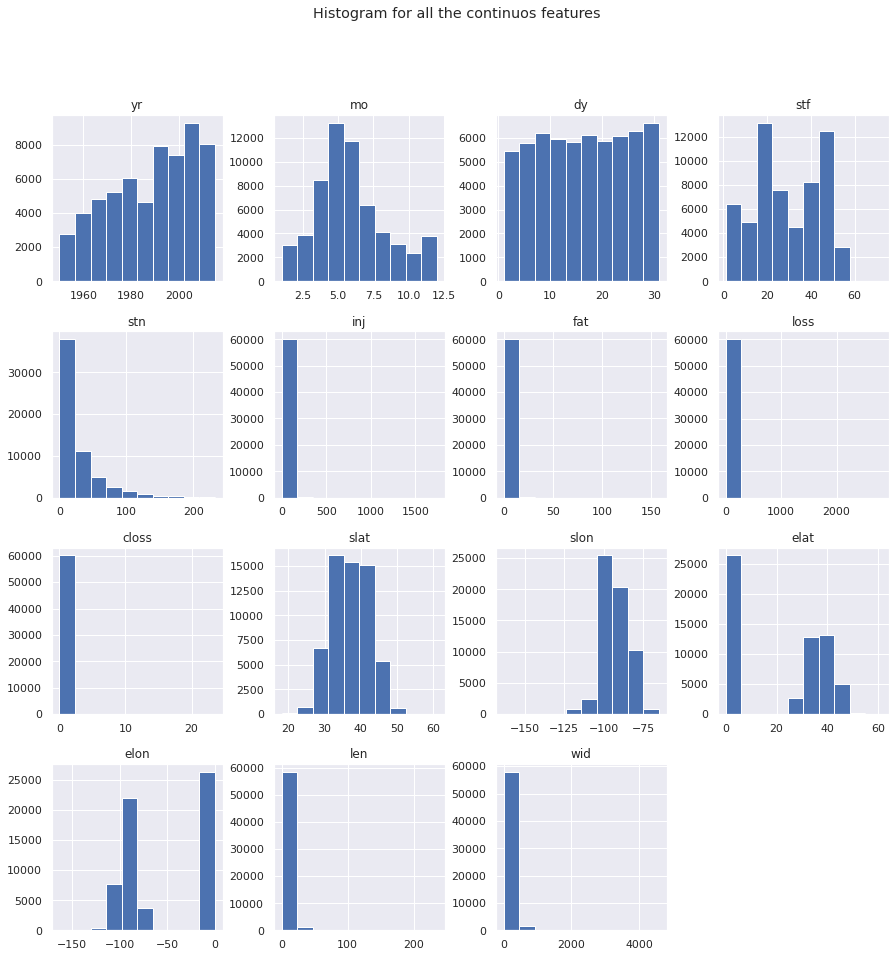

In [10]:
# Visualization

# Histograms of continuous features
# Choosing only numerical columns and columns where cardinality is greater than or equal to ten

df.hist(column=['yr', 'mo', 'dy', 'stf', 'stn', 'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len', 'wid']);
plt.suptitle("Histogram for all the continuos features")
plt.show()

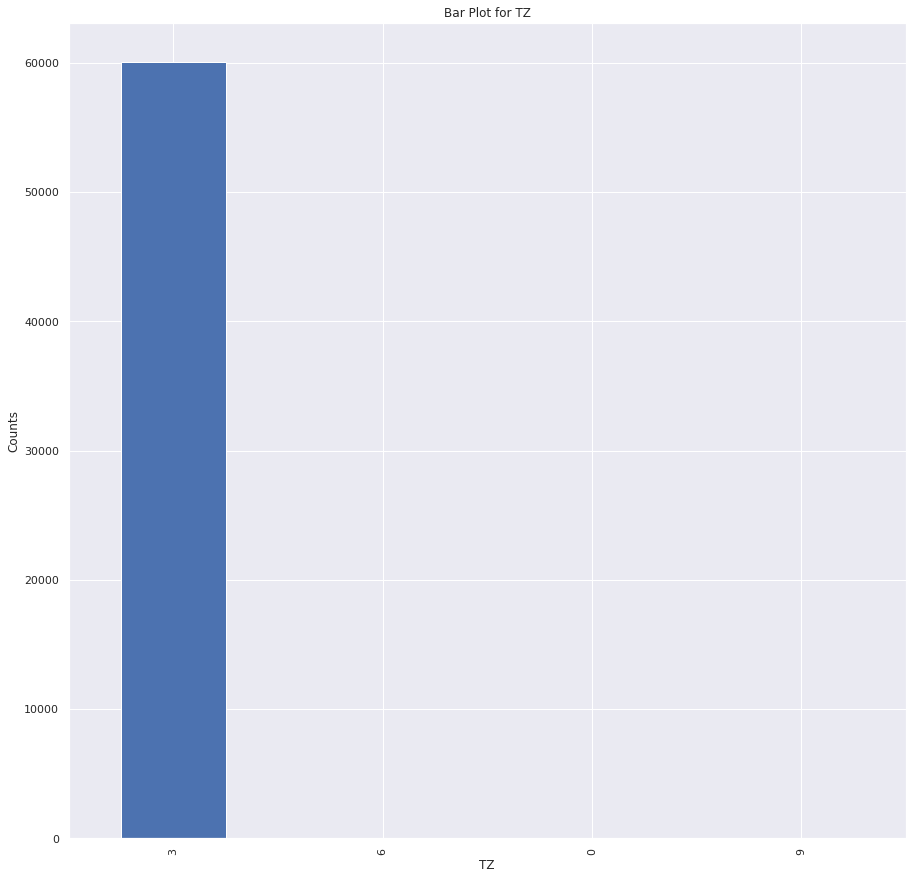

In [11]:
# Categorical Features Visualizations

# Time Zone feature bar plot
df['tz'].value_counts().plot.bar();
plt.xlabel('TZ')
plt.ylabel('Counts')
plt.title('Bar Plot for TZ')
plt.show()

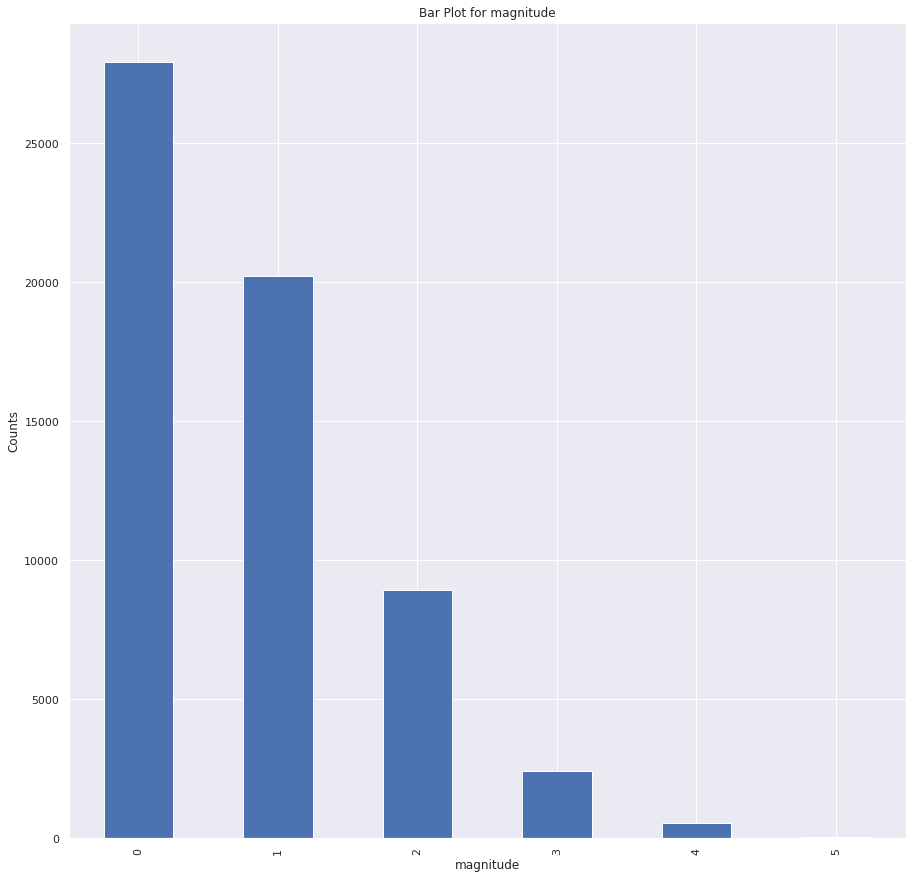

In [12]:
# Categorical Features Visualizations

# Magnitude feature bar plot
df['mag'].value_counts().plot.bar();
plt.xlabel('magnitude')
plt.ylabel('Counts')
plt.title('Bar Plot for magnitude')
plt.show()

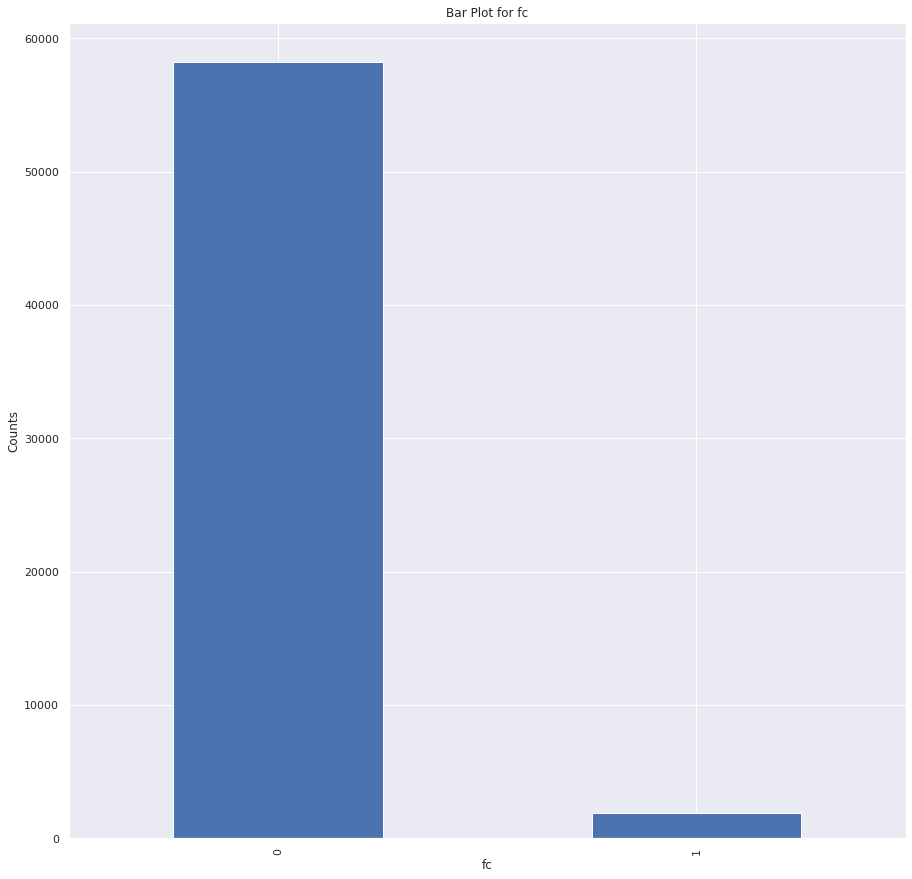

In [13]:
# Categorical Features Visualizations

# Magnitude feature bar plot
df['fc'].value_counts().plot.bar();
plt.xlabel('fc')
plt.ylabel('Counts')
plt.title('Bar Plot for fc')
plt.show()

<h4>Heatmap Correlation</h4>

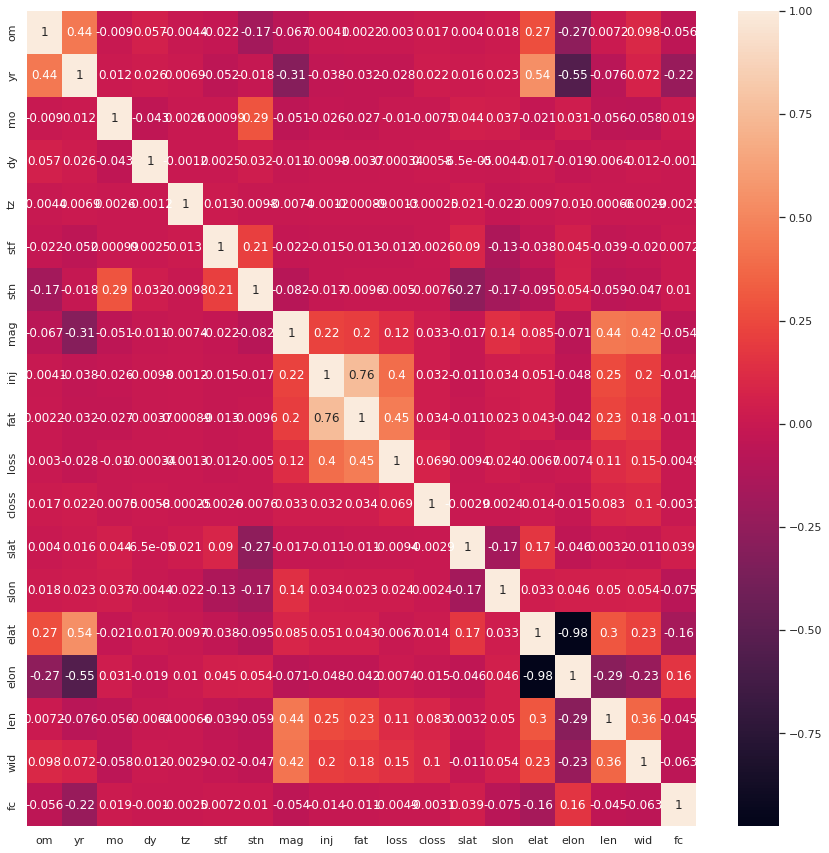

In [14]:
sns.heatmap(df.corr(), annot=True);

## **2. Preprocessing data**

<p style="font-size: 18px">Dropping columns that do not add any information to the model training</p>

<p style="font-size: 18px">The "om" column just denotes tornado number. It does not add anything to the data</p>

In [15]:
df.drop(['om'], axis = 1, inplace = True)

<p style="font-size: 18px">The "date" column is redundant since there are separate columns for year, month and day.</p>

In [16]:
df.drop(['date'], axis = 1, inplace = True)

<p style="font-size: 18px">The timezone(tz) column does not add any new information to the dataset since location information is already represented by other columns</p>

In [17]:
df.drop(['tz'], axis = 1, inplace = True)

<p style="font-size: 18px">The "stf" and "stn" columns are redundant since the "st" column already represents that data</p>

In [18]:
df.drop(['stf', 'stn'], axis = 1, inplace = True)

In [19]:
df.drop(['fc'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      60114 non-null  Int64  
 1   mo      60114 non-null  Int64  
 2   dy      60114 non-null  Int64  
 3   time    60114 non-null  string 
 4   st      60114 non-null  string 
 5   mag     60114 non-null  Int64  
 6   inj     60114 non-null  Int64  
 7   fat     60114 non-null  Int64  
 8   loss    60114 non-null  Float64
 9   closs   60114 non-null  Float64
 10  slat    60114 non-null  Float64
 11  slon    60114 non-null  Float64
 12  elat    60114 non-null  Float64
 13  elon    60114 non-null  Float64
 14  len     60114 non-null  Float64
 15  wid     60114 non-null  Int64  
dtypes: Float64(7), Int64(7), string(2)
memory usage: 8.1 MB


<p style="font-size: 18px">Replacing zero values in the elat and elon columns with the starting values</p>

In [21]:
df.head()

,yr,mo,dy,time,st,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid
0,1950,1,3,11:00:00,MO,3,3,0,6.00000,0.00000,38.77000,-90.22000,38.83000,-90.03000,9.50000,150
1,1950,1,3,11:55:00,IL,3,3,0,5.00000,0.00000,39.10000,-89.30000,39.12000,-89.23000,3.60000,130
2,1950,1,3,16:00:00,OH,1,1,0,4.00000,0.00000,40.88000,-84.58000,0.00000,0.00000,0.10000,10
3,1950,1,13,5:25:00,AR,3,1,1,3.00000,0.00000,34.40000,-94.37000,0.00000,0.00000,0.60000,17
4,1950,1,25,19:30:00,MO,2,5,0,5.00000,0.00000,37.60000,-90.68000,37.63000,-90.65000,2.30000,300


In [22]:
df.loc[df['elat'] == 0, 'elat'] = df['slat']
df.loc[df['elon'] == 0, 'elon'] = df['slon']

In [23]:
df.head()

,yr,mo,dy,time,st,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid
0,1950,1,3,11:00:00,MO,3,3,0,6.00000,0.00000,38.77000,-90.22000,38.83000,-90.03000,9.50000,150
1,1950,1,3,11:55:00,IL,3,3,0,5.00000,0.00000,39.10000,-89.30000,39.12000,-89.23000,3.60000,130
2,1950,1,3,16:00:00,OH,1,1,0,4.00000,0.00000,40.88000,-84.58000,40.88000,-84.58000,0.10000,10
3,1950,1,13,5:25:00,AR,3,1,1,3.00000,0.00000,34.40000,-94.37000,34.40000,-94.37000,0.60000,17
4,1950,1,25,19:30:00,MO,2,5,0,5.00000,0.00000,37.60000,-90.68000,37.63000,-90.65000,2.30000,300


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      60114 non-null  Int64  
 1   mo      60114 non-null  Int64  
 2   dy      60114 non-null  Int64  
 3   time    60114 non-null  string 
 4   st      60114 non-null  string 
 5   mag     60114 non-null  Int64  
 6   inj     60114 non-null  Int64  
 7   fat     60114 non-null  Int64  
 8   loss    60114 non-null  Float64
 9   closs   60114 non-null  Float64
 10  slat    60114 non-null  Float64
 11  slon    60114 non-null  Float64
 12  elat    60114 non-null  Float64
 13  elon    60114 non-null  Float64
 14  len     60114 non-null  Float64
 15  wid     60114 non-null  Int64  
dtypes: Float64(7), Int64(7), string(2)
memory usage: 8.1 MB


## **3. Building the Model to predict the features like starting latitude and longitude, ending latitude and longitude of a tornado**

After going through the lectures, the prescribed text book and an article [7] mentioned in the reference, We decided to use three main evaluation metrics for the regression model we have planned to build.

**1. Mean Squared Error <br/>2. Root Mean Squared Error <br/>3. Mean Absolute Error<br/>**
We discuss in brief below about each of the metric mentioned above.

**1. Mean Squared Error**

The mean or average of the squared differences between predicted and expected target values in a dataset is used to calculate the MSE.

Basically, the lower the MSE the better is the prediction.

        MSE = 1/n∑(actual-predicted)^2
The units of the MSE are squared units.

Mean Squared Error (MSE) is a popular error metric for regression problems for several reasons, one of which is the squaring concept, which has the effect of inflating large errors and thus has the effect of “punishing” models more for larger errors.

**2. Root Mean Squared Error**

The root mean square error is the residuals' standard deviation, where the residuals are the measure of how far the data points are from the regression line . In other words, it indicates  how concentrated the data is around the line of the best fit.

        RMSE = √ 1/n∑(actual-predicted)^2 = √ MSE

The units of the RMSE are the same as the original units of the target value.

This is another popular error metric for regression as generally regression prediction models are frequently trained using MSE loss, and their performance is assessed and reported using RMSE.

**3. Mean Absolute Error**

The mean absolute error is the average difference between the observations (true values) and model output (predictions). 

The changes in MAE, in contrast to the RMSE, are linear i.e the MAE does not give distinct sorts of errors more or less weight; instead, the scores rise linearly as the amount of error increases.

        MAE = 1/n∑[abs(actual-predicted)]
        
We decided to use these three regression measures indicated above for the assignment due to its aforementioned behaviour.

### **Starting latitude and Statring Longitude**

In this section, we will try to predict the starting and ending latitude and longitudes of the tornado.

Although this purely depends on weather conditions, In this section we tried to predict the tornado location based on the other parameters available in this dataset.

The preciseness of the location could be enhanced by adding a few other weather related features.

First we would like to see where the tornadoes are most frequently seen in the states and then we would like to start working from there.

In [25]:
df['ones'] = np.ones(len(df))
df.groupby(['st'])['ones'].sum().sort_values(ascending=False)

st
TX   8484.00000
KS   4027.00000
OK   3658.00000
FL   3233.00000
NE   2758.00000
IA   2404.00000
IL   2349.00000
MO   2154.00000
CO   2071.00000
MS   2034.00000
AL   1979.00000
LA   1858.00000
SD   1745.00000
AR   1715.00000
MN   1708.00000
GA   1483.00000
ND   1483.00000
IN   1391.00000
WI   1309.00000
NC   1239.00000
TN   1145.00000
OH   1014.00000
MI   1004.00000
SC    942.00000
KY    900.00000
PA    752.00000
VA    675.00000
WY    651.00000
NM    561.00000
CA    423.00000
NY    422.00000
MT    406.00000
MD    346.00000
AZ    241.00000
ID    206.00000
MA    158.00000
NJ    142.00000
WV    128.00000
ME    124.00000
UT    123.00000
WA    112.00000
OR    105.00000
CT     94.00000
NH     88.00000
NV     86.00000
DE     60.00000
VT     44.00000
HI     41.00000
PR     24.00000
RI     10.00000
AK      4.00000
DC      1.00000
Name: ones, dtype: float64

As we can see from the above list, we see that texas has got the highest number of tornadoes seen in the entire dataset which is 8484.

so we will be trying to predict the tornado position as that data is quite rich.

Once we are successfull in doing so, we could run the same model for the entire dataset.

The following code creates a new dataframe separately for Texas state.

In [26]:
txdf = df[df['st']=='TX']
txdf = txdf.drop('ones',axis=1)

In [27]:
txdf.groupby('st')['slat'].nunique()

st
TX    843
Name: slat, dtype: int64

The following is the head of the dataframe which shows all the columns and the data inside them giving us a basic understanding where to start

In [28]:
txdf.head()

,yr,mo,dy,time,st,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid
6,1950,1,26,18:00:00,TX,2,2,0,0.00000,0.00000,26.88000,-98.12000,26.88000,-98.05000,4.70000,133
7,1950,2,11,13:10:00,TX,2,0,0,4.00000,0.00000,29.42000,-95.25000,29.52000,-95.13000,9.90000,400
8,1950,2,11,13:50:00,TX,3,12,1,4.00000,0.00000,29.67000,-95.05000,29.83000,-95.00000,12.00000,1000
9,1950,2,11,21:00:00,TX,2,5,0,5.00000,0.00000,32.35000,-95.20000,32.42000,-95.20000,4.60000,100
10,1950,2,11,23:55:00,TX,2,6,0,5.00000,0.00000,32.98000,-94.63000,33.00000,-94.70000,4.50000,67


from the below code we can see the most common locations in the entire dataset of 8484 records.

In [29]:
df['slat'].nunique()

2319

In [30]:
df['slon'].nunique()

4234

From the above, we can see that there are 2319 unique latititude locations and 4234 unique longitude locations of the start of a tornado

The following code visualizes the records to figure out the hot spots of the tornadoes in the map based on the geolocations we have with us in the dataset.

In [31]:
latlonlist = []
for i in range(len(txdf)):
    latlonlist.append([txdf['slat'].iloc[i],txdf['slon'].iloc[i]])

In [32]:
map = folium.Map(location=[31.2412024,-97.7553315], zoom_start=7)
HeatMap(latlonlist,min_opacity=0.3, radius=10).add_to(map)
map

From the above map, we can see that the tornadoes are most frequently seen in cities like Houston, Baumont, FortWorth, San Antonio, Corpus, Lubbock.

Since the numbers are huge, we will not be concentrating on one location.

For now we will be working on the entire state's data to see how the predictions comes

In [33]:
# map = folium.Map(location=[31.2412024,-97.7553315], zoom_start=7)
# for x in latlonlist:
#     folium.CircleMarker([x[0], x[1]], radius=0.5, color='orange', fill=True, fill_opacity=0.7, fill_color='orange').add_to(map)
# # HeatMap(latlonlist,min_opacity=0.2, radius=10).add_to(map)
# map

To figure out the best features, correlation graph helps us which is shown below.

<AxesSubplot:>

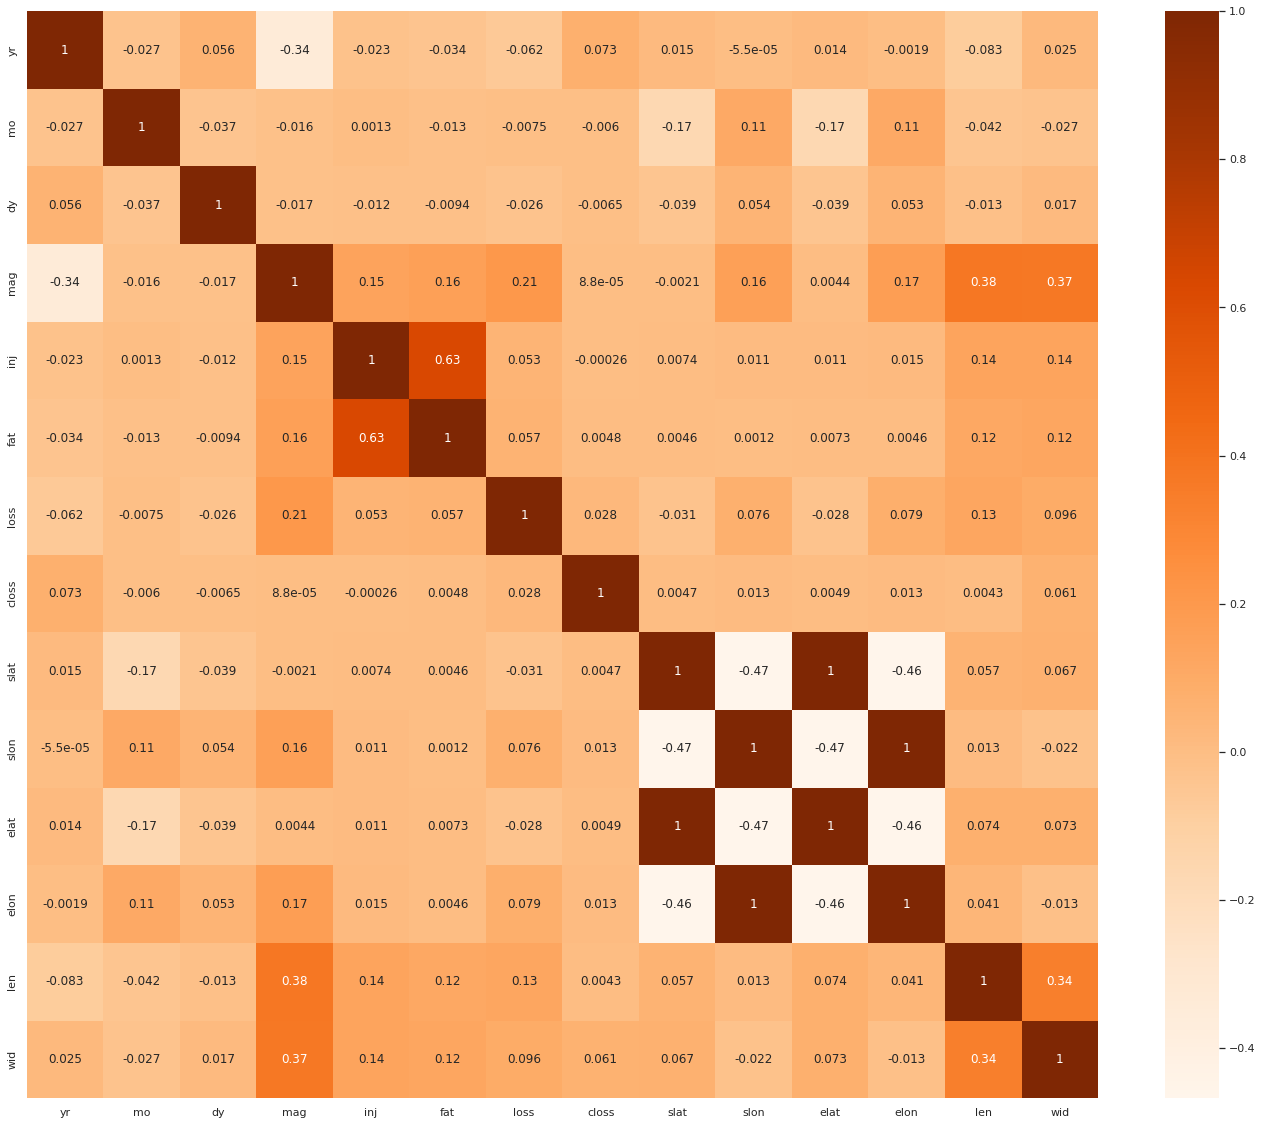

In [34]:
sns.set(rc={'figure.figsize':(24,20)})
dataCorrelation = txdf.corr()
sns.heatmap(dataCorrelation, cmap="Oranges", annot=True)

From the above we can see there is no strong relationship of slat and slon features with any of the other features in the dataset.

Hence, we would like to try all the features in the dataset to figure out the slat and slon.

Although this is completely based on weather conditions, we are trying to predict the slat and slon features using ensembles to see if it would work.

We are doing this simply to see if ensembles could help us predict the features with the remaining data.

The following K-Best Features method is writtten to extract the best features as all of our features are continuous except the Date fields.

In [35]:
def getKFeatures(data, kValue, target):
    predictors = list(data.describe(include=['number']).columns)
    predictors.remove('slat')
    predictors.remove('slon')
    predictors.remove('elat')
    predictors.remove('elon')
    try:
        predictors.remove(target)
    except:
        pass
    bestFeatureSelection = SelectKBest(k=kValue)
    # print(data[predictors].head(),"\n\n\n",data[target].head())
    # print(type(data[target]))
    _ = bestFeatureSelection.fit_transform(data[predictors],data[target])
    bools = bestFeatureSelection.get_support()
    selected = []
    for i in range(len(predictors)):
        if bools[i]==True:
            selected.append(predictors[i])
    return selected

In the above code we remove the slat, slon, elat and elon features as these are the features we would like to predict.

Now we would like to see the top features picked by the KBest features starting k-value from 1 till all the features.

In [36]:
len(txdf.columns)

16

In [37]:
for i in range(1,len(txdf.columns)-5):
    print(getKFeatures(txdf, i, ['slat']))

['yr']
['yr', 'closs']
['yr', 'mo', 'closs']
['yr', 'mo', 'loss', 'closs']
['yr', 'mo', 'dy', 'loss', 'closs']
['yr', 'mo', 'dy', 'mag', 'loss', 'closs']
['yr', 'mo', 'dy', 'mag', 'loss', 'closs', 'wid']
['yr', 'mo', 'dy', 'mag', 'inj', 'loss', 'closs', 'wid']
['yr', 'mo', 'dy', 'mag', 'inj', 'loss', 'closs', 'len', 'wid']
['yr', 'mo', 'dy', 'mag', 'inj', 'fat', 'loss', 'closs', 'len', 'wid']


After doing some trial and erros on the dataset with all the above features, we have observed that when the K-value is 6, the features selected like Year, Month, Crop loss, Starting longitude, ending latitude, ending longitude were showing better results to predict the slat feature.

In [38]:
selected = getKFeatures(txdf, 7, ['slat'])
print(selected)

['yr', 'mo', 'dy', 'mag', 'loss', 'closs', 'wid']


In [39]:
selected = getKFeatures(txdf, 6, ['slon'])
print(selected)

['yr', 'mo', 'dy', 'mag', 'loss', 'closs']


In [40]:
selected = getKFeatures(txdf, 8, ['slon'])
print(selected)

['yr', 'mo', 'dy', 'mag', 'loss', 'closs', 'len', 'wid']


In [41]:
class RegressionNeuralNet(nn.Module):
    def __init__(self, inputDimensions, outputDimensions):
        nn.Module.__init__(self)
        # self.hiddenLayers = nn.Sequential(nn.Linear(inputDimensions,64),nn.Linear(64,32),nn.Linear(32,8),nn.Linear(8,outputDimensions))
        # self.hiddenLayers = nn.Sequential(nn.Linear(inputDimensions,32),nn.Linear(32,8),nn.Linear(16,outputDimensions))
        # self.hiddenLayers = nn.Sequential(nn.Linear(inputDimensions,16),nn.Linear(16,outputDimensions))
        self.hiddenLayers = nn.Sequential(nn.Linear(inputDimensions,inputDimensions), nn.ReLU(), nn.Linear(inputDimensions,inputDimensions), nn.ReLU(), nn.Linear(inputDimensions,inputDimensions), nn.ReLU(), nn.Linear(inputDimensions,round(inputDimensions/2)), nn.Linear(round(inputDimensions/2),outputDimensions))


    def forward(self,trainX):
        # print(trainX.size(),trainX)
        return self.hiddenLayers(trainX)

In [42]:
current_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
current_device.type

'cpu'

In [43]:
predictors = txdf[selected].copy()
target = txdf[['slat','slon']].copy()
xTrain, xTest, yTrain, yTest = train_test_split(predictors, target, test_size=0.3, shuffle = True)

In [44]:
def prepareDataset(df,inputFeatures, outputFeatures):
    my_data = list()
    for i in range(len(df)):
        my_data.append((torch.FloatTensor(list(df[inputFeatures].iloc[i])),torch.FloatTensor(list(df[outputFeatures].iloc[i]))))
    return my_data

In [45]:
my_data = prepareDataset(txdf,selected,['slat','slon'])

In [46]:
def getTrainTestBatches(my_data, ssize, bsize):
    train_data, test_data = torch.utils.data.random_split(my_data, [round(len(my_data)*(1-ssize)), round(len(my_data)*ssize)])
    
    train_batches = torch.utils.data.DataLoader(train_data, batch_size=bsize, shuffle=True) #shuffling data to get random samples instead of sequence
    # print(len(train_batches))
    
    test_batches = torch.utils.data.DataLoader(test_data, batch_size=bsize, shuffle=True)
    return train_batches, test_batches

In [47]:
train_batches, test_batches = getTrainTestBatches(my_data, 0.7, 32)

In [48]:
print(len(test_batches)*32,len(train_batches)*32)

5952 2560


In [49]:
# simple plot to plot between iterations and the cost
def plotData(title, xlabel, ylabel,x, y, color, marker):
    # plt.scatter(x,loss,color='orange')
    plt.plot(x,y,color=color, marker=marker, linestyle='dashed',linewidth=2, markersize=6)
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [50]:
def trainTestMyModel(train_batches,epochs,lr, i):
    colors = ['violet','indigo','blue','green', 'yellow', 'orange', 'red']
    lossValues = []
    gradScaler = torch.cuda.amp.GradScaler()
    lossFunction = nn.MSELoss()
    myModel = RegressionNeuralNet(len(selected),2).to(current_device)
    optimizer = torch.optim.SGD(myModel.parameters(), lr=lr, momentum=0.9)
    # optimizer = torch.optim.Adam(myModel.parameters(), lr=0.001)
    for epoch in range(epochs):
        current_loss = []
        current_loss.clear()
        for itr,(x_true, y_true) in enumerate(train_batches):
            xTrue = (x_true.requires_grad_()).to(current_device)
            yTrue = (y_true).to(current_device)
            optimizer.zero_grad()
            yPred = myModel(xTrue)
            loss = lossFunction(yPred,yTrue)
            gradScaler.scale(loss).backward()
            gradScaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(myModel.parameters(), max_norm=1.0)
            gradScaler.step(optimizer)
            gradScaler.update()
            current_loss.append(loss.item())
        lossValues.append(sum(current_loss)/len(current_loss))
    plt.scatter(range(1,len(lossValues)+1),lossValues)
    plt.plot(range(1,len(lossValues)+1),lossValues,color=colors[i], marker="o", linestyle='dashed',linewidth=1, markersize=6)
    plt.title("Model "+str(i))
    plt.xlabel("epoches")
    plt.ylabel("loss values")
    # plotData("Cost with respect to models at each epoch","Cost","Epoches",range(1,len(lossValues)+1),lossValues,'orange','+')
    return myModel

In [51]:
def testModelsPredictAccuracy(models,test_batches):
    accs = []
    ypred = []
    ytrue = []
    final = []
    temp = []
    for i in range(len(models)):
        ypred.append([])
    for itr,(x_true, y_true) in enumerate(test_batches):
        temp.clear()
        ytrue = ytrue + y_true.detach().numpy().tolist()
        x_true = (x_true.requires_grad_()).to(current_device)
        for i in range(len(models)):
            yPred = models[i](x_true)
            ypred[i] = ypred[i] + yPred.cpu().detach().numpy().tolist()
            temp.append(yPred)
        z = np.zeros((len(y_true),2))
        for i in range(len(models)):
            z = np.add(z,temp[i].cpu().detach().numpy())
        z = z/len(models)
        accs = accs + ((z/y_true.cpu().detach().numpy())*100).tolist()
        final = final + z.tolist()
        # print(z)
        # print(accs)
        # return
    return accs, ypred, ytrue, final

In [52]:
models= []
def buildNModelsAndTest(n,train_batches, test_batches,epochs,lr):
    models.clear()
    for i in range(n):
        models.append(trainTestMyModel(train_batches,epochs,lr,i))
    return testModelsPredictAccuracy(models,test_batches)

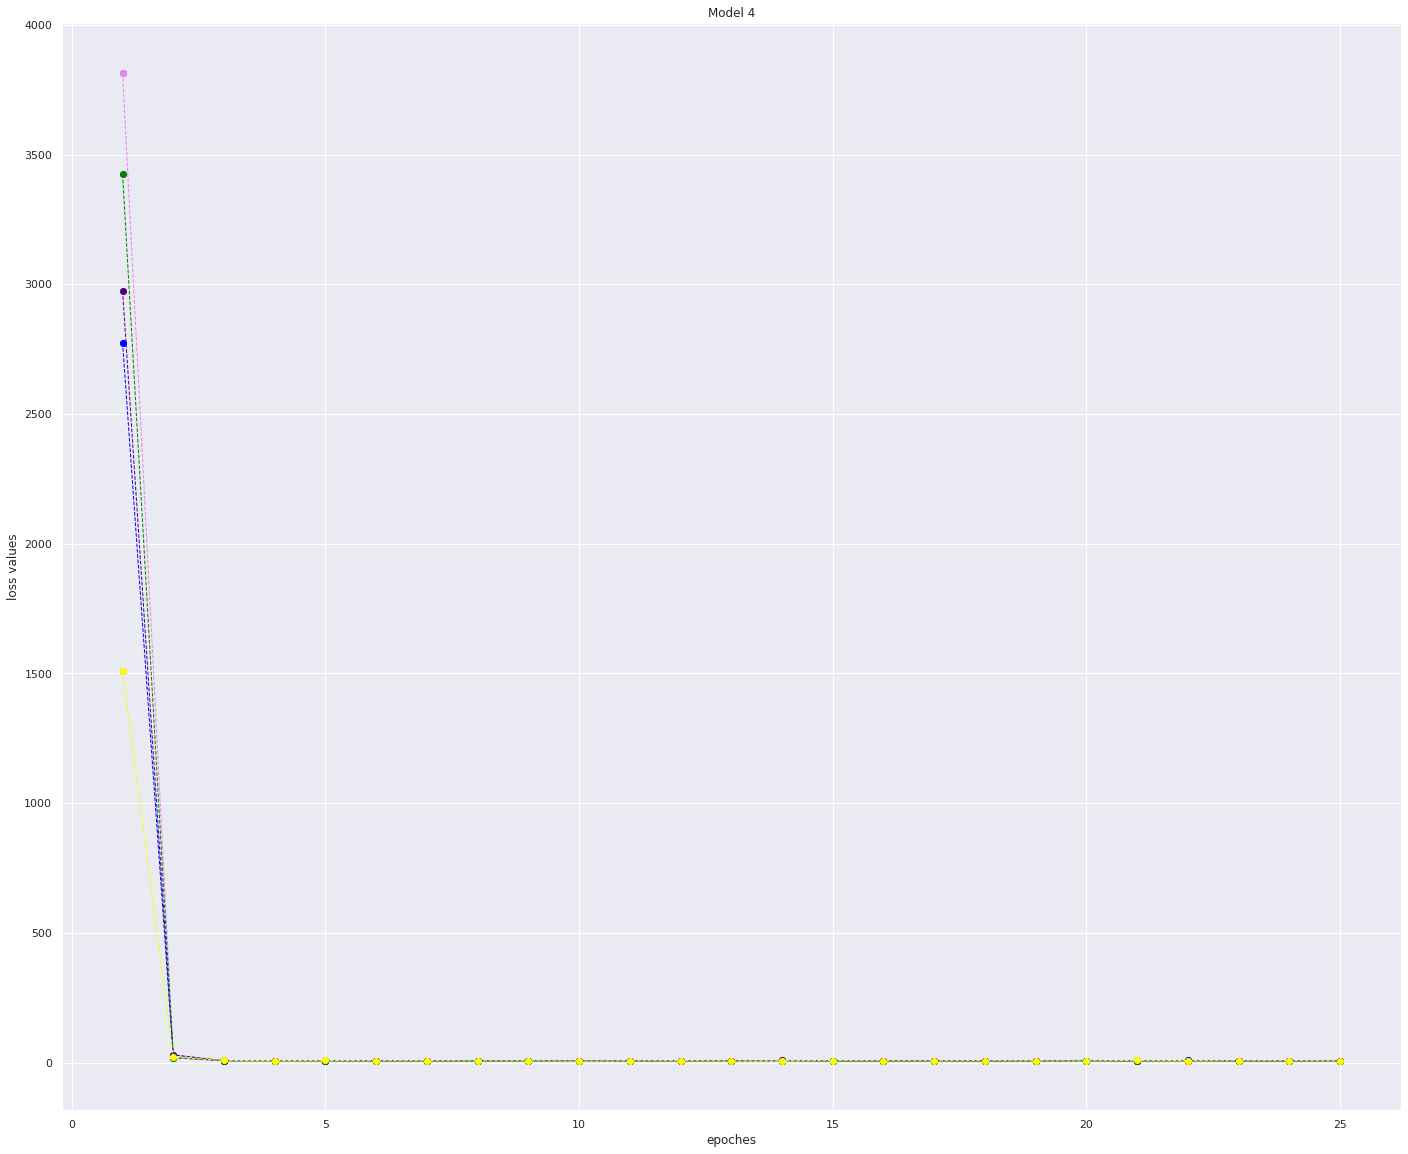

In [53]:
a,b,c,d = buildNModelsAndTest(5,train_batches,test_batches,25,0.001)

The above scatter plot shows the training cost of the models trained. different colors shows different models costs.

In [54]:
# a,b,c,d = buildNModelsAndTest(5,train_batches,test_batches,25,0.001)

In [55]:
print(len(a),len(b[0]),len(c),len(d))

5939 5939 5939 5939


This is how accurate the predictions were. we divided the predicted value with the actual value and these are the accuracies.

In [56]:
i=randint(0,len(a)-1)
j = randint(0,len(b)-1)
print("Accuracy : ",a[i],"\nPredicted Values by model ["+str(j+1)+"] : ",b[j][i],"\nActual Value: ",c[i],"\nFinal Value (mean of all models): ",d[i],"\n")

Accuracy :  [106.14466434767267, 102.01306524741472] 
Predicted Values by model [2] :  [30.78148078918457, -95.97169494628906] 
Actual Value:  [29.75, -95.05000305175781] 
Final Value (mean of all models):  [31.578037643432616, -96.96342163085937] 



The following is the root mean square error on the final predictions and the true values.

In [57]:
from sklearn.metrics import *
print("R Squared Error : ",r2_score(c, d))
print("Mean Squared Error : ",mean_squared_error(c, d))
print("Mean Absolute Error :",mean_absolute_error(c, d))

R Squared Error :  -0.11695906326007222
Mean Squared Error :  6.842841340591368
Mean Absolute Error : 2.140363347255377


From the above evaluation metrics, we can see that the model is not performing too bad considering the features we are predicting based on the input features.

Although the values are not quite good, but as per our understanding on the data and the dataset, we fee that R-Squared value is good.

The Mean Squared Error value is not in the expected range, because the values are too high as they are in the ranges of 90's and 100's and 110's.

The Mean absolute error gives us a good understanding how the model is predicting the values compared to the actual values.

all the above metrics are calculated with respect to the mean value of the predicted values and the actual values.

We also believe training the model with more layers might increase the accuracy, however we are positive that the difference will not be too much.

### **Ending latitude and longitude**

The following line of code prepares the dataset for ending latitude and longitude as the values to be predicted.

In [58]:
my_elat_elon_data = prepareDataset(txdf,selected,['elat','elon'])

Now that the data is ready, we can prepare the batches of both training and testing datasets as shown below.

In [59]:
ending_train_batches, ending_test_batches = getTrainTestBatches(my_elat_elon_data, 0.7, 32)

Now that the training and testing batches are ready with batch size of 32. We can train and predict the values as shown below

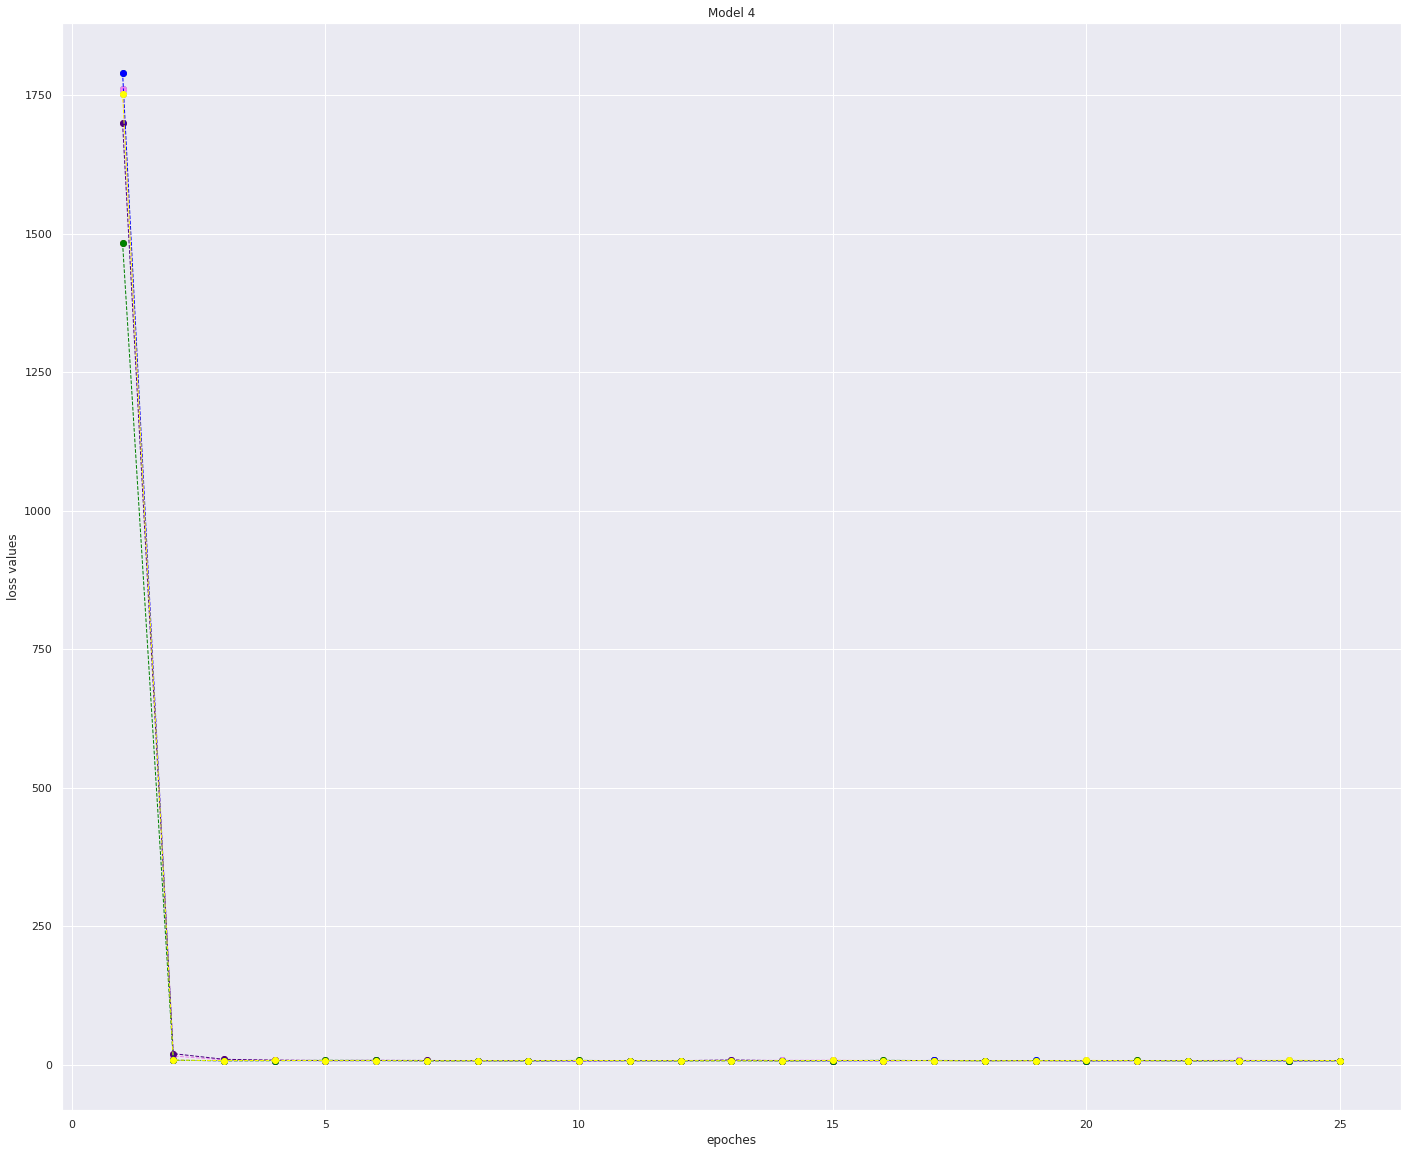

In [60]:
ea,eb,ec,ed = buildNModelsAndTest(5,ending_train_batches,ending_test_batches,25,0.001)

This is how accurate the predictions were. we divided the predicted value with the actual value and these are the accuracies.

In [61]:
i=randint(0,len(ea)-1)
j = randint(0,len(eb))
print("Accuracy : ",ea[i],"\nPredicted Values by model ["+str(j+1)+"] : ",eb[j][i],"\nActual Value: ",ec[i],"\nFinal Value (mean of all models): ",ed[i],"\n")

IndexError: list index out of range

The following is the root mean square error on the final predictions and the true values.

In [ ]:
from sklearn.metrics import *
print("R Squared Error : ",r2_score(ec, ed))
print("Mean Squared Error : ",mean_squared_error(ec, ed))
print("Mean Absolute Error :",mean_absolute_error(ec, ed))

From the above evaluation metrics, we can see that the model is not performing too bad considering the features we are predicting based on the input features.

Although the values are not quite good, but as per our understanding on the data and the dataset, we fee that R-Squared value is good.

The Mean Squared Error value is not in the expected range, because the values are too high as they are in the ranges of 90's and 100's and 110's.

The Mean absolute error gives us a good understanding how the model is predicting the values compared to the actual values.

all the above metrics are calculated with respect to the mean value of the predicted values and the actual values.

We also believe training the model with more layers might increase the accuracy, however we are positive that the difference will not be too much.

### **Starting and Ending latitude and longitude prediction on the whole dataset.**

As shown above, we can use the same methods to predict the locations of the tornadoes of the entire dataset.

In [ ]:
selected = getKFeatures(df, 8, 'slat')

In [ ]:
selected

In [ ]:
starting_whole_data = prepareDataset(df,selected,['slat','slon'])

In [ ]:
selected = getKFeatures(df, 8, 'elat')

In [ ]:
ending_whole_data = prepareDataset(df,selected,['elat','elon'])

In [ ]:
sw_train_batches, sw_test_batches = getTrainTestBatches(starting_whole_data, 0.7, 32)
ew_train_batches, ew_test_batches = getTrainTestBatches(ending_whole_data, 0.7, 32)

In [ ]:
swa,swb,swc,swd = buildNModelsAndTest(3,sw_train_batches,sw_test_batches,50,0.001)

In [ ]:
ewa,ewb,ewc,ewd = buildNModelsAndTest(3,ew_train_batches,ew_test_batches,50,0.001)

In [ ]:
from sklearn.metrics import *
print("R Squared Error : ",r2_score(swc, swd))
print("Mean Squared Error : ",mean_squared_error(swc, swd))
print("Mean Absolute Error :",mean_absolute_error(swc, swd))

In [ ]:
from sklearn.metrics import *
print("R Squared Error : ",r2_score(ewc, ewd))
print("Mean Squared Error : ",mean_squared_error(ewc, ewd))
print("Mean Absolute Error :",mean_absolute_error(ewc, ewd))

In [ ]:
i=randint(0,len(swa)-1)
j = randint(0,len(swb)-1)
print("Accuracy : ",swa[i],"\nPredicted Values by model ["+str(j+1)+"] : ",swb[j][i],"\nActual Value: ",swc[i],"\nFinal Value (mean of all models): ",swd[i],"\n")

In [ ]:
i=randint(0,len(ewa)-1)
j = randint(0,len(ewb)-1)
print("Accuracy : ",ewa[i],"\nPredicted Values by model ["+str(j+1)+"] : ",ewb[j][i],"\nActual Value: ",ewc[i],"\nFinal Value (mean of all models): ",ewd[i],"\n")

From the above, Although the model is not performing the best on the whole dataset as we explained earlier that the prediction is mostly dependent on the weather conditions, However, we can see that the model is performing quite well than anticipated. the MSE and MAE are not too high for the model built.

### **Crop Loss Model**

The following code shows the length of the records we have and the information in them

In [ ]:
print(len(df))==None and df.head()

The following are the unique values in the closs feature as shown below

In [ ]:
uv = list(df['closs'].unique())

In [ ]:
plt.scatter(range(1,len(uv)+1),uv)

Since there are many unique values, We believe its not a good idea to treat this feature as a classification feature. Although its a numerical features, we wanted to see if we could make this a classification instead of regression. From the above graph, its clear that it is not possible to do that.

In [ ]:
plt.scatter(range(1,len(df)+1),df['closs'])

From the above plot, its clear that the all the crop loss is happened very recently in the dataset as the records shows the crop loss starting from approximately 48000 records which were ver recent records.

In [ ]:
dfs = df.sort_values('yr')

In [ ]:
dfsc = dfs[dfs['closs']>0]

In [ ]:
len(dfsc)

In [ ]:
dfsc = dfsc.sort_values('closs', ascending=False)

In [ ]:
dfsc.head()

The above information shows that crop loss happened very recently as the years are shown for each loss in the above table.

In [ ]:
plt.scatter(range(1,len(dfsc)+1),dfsc['closs'])

From both the above graphs we can see that only the recent years have the crop loss as shown in the above table.

now that we know that year is an import feature that effects the crop loss, let us figure out the other features that are effecting this crop loss featue using k-best features method from sklearn as shown below.

In [ ]:
selected = getKFeatures(df, 8, 'closs')

In [ ]:
selected

As we can see that year is in the front of the list which is followed by the magnitude which is obvious for us to understand how its effect the crop loss.

All the other features are also important in predicting the crop loss caused by the tornado.

now that we have the features, we can train a model on these and see how they help us in predicting our target feature.

The following code shows the creation of the training and testing datasets.

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(df[selected], df['closs'], test_size=0.3, shuffle = True)

Now that we have the data, we can train the model and get the predictions on the crop loss as shown below

In [ ]:
rfRegressor = RandomForestRegressor()
rfRegressor.fit(xTrain,yTrain)
yPred = rfRegressor.predict(xTest)

Now that we have the predictions ready, lets see some samples from the dataset selected at random and see how much closer they were predicted as shown below.

In [ ]:
yTest = yTest.tolist()
while True==True:
    i=randint(0,len(yPred)-1)
    if yTest[i]!=0:
        print(yPred[i],yTest[i])
        break

From the above we can see that the model is predicting the values properly and the error seems to be minimal. Lets now check how the model is performingn with the choosen evaluation metrics for the regression problem as shown below.

In [ ]:
from sklearn.metrics import *
print("R Squared Error : ",r2_score(ec, ed))
print("Mean Squared Error : ",mean_squared_error(ec, ed))
print("Mean Absolute Error :",mean_absolute_error(ec, ed))

From the above evaluation metrics, we can see that the model is not performing too bad considering the features we are predicting based on the input features.

Although the values are not quite good, but as per our understanding on the data and the dataset, we fee that R-Squared value is good.

The Mean Squared Error value is not in the expected range, because the values are too high as they are in the ranges of 90's and 100's and 110's.

The Mean absolute error gives us a good understanding how the model is predicting the values compared to the actual values.

all the above metrics are calculated with respect to the mean value of the predicted values and the actual values.

We also believe training the model with more layers might increase the accuracy, however we are positive that the difference will not be too much.

#### We are building multiple models to predict/classify different target variables. The sections below show the model creation and evaluation for different target variables such as starting latitude, starting longitude, ending latitude, ending longitude, loss, crop loss, length, width and magnitude of the tornado.

## **4. Building the Model to classify magnitude**


Now that we have the cleaned and preprocessed data, we can start building the model and train and test it according to our requirement to predict the magnitude of the tornado based on the other features present in the dataset.

We will use nunique and unique function to get the unique values across the magnitude to column to understand it better before commencing the model building.

In [ ]:
df['mag'].nunique()

In [ ]:
df['mag'].unique()

From the above we can see that the magnitude feature have only 6 attributes in the feature. Hence, We believe we can convert this numerical feature in to a categorical feature and use it predict the values accordingly.

so, to perform these operations we would like to take a copy of the actual dataset and then try on it as shown below.

In [ ]:
cdf = df.copy()

now that we have a copy of the dataframe, we can start converting our numeric magnitude feature to a categorical feature as we wanted earlier which is shown below.

In [ ]:
cdf = cdf.astype({'mag':'string'})

Now that the feature is conveted, we can now select the features that are having high influence on this feature and then use them to predict the value.

the following are the list of columns in the dataset.

In [ ]:
cols = list(cdf.columns)

In [ ]:
cols

Since we will be predicting the magnitude feature, we don't want that to be in the input features to the model. Hence, we drop it as shown below.

In [ ]:
cols.remove('mag')

In [ ]:
cols

Now that we have the dataset and the columns that we need for the prediction, we want to know which columns are best to predict the magnitude features. Since the whoe dataset contains most of the features as numeric, we believe that we can use select l-best features method from sklearn that will help us with the best features as shown below.

In [ ]:
def getKFeatures(data,kValue, target):
    predictors = list(data.describe(include=['number']).columns)
    predictors.remove(target)
    bestFeatureSelection = SelectKBest(k=kValue)
    _ = bestFeatureSelection.fit_transform(data[predictors],data[target])
    bools = bestFeatureSelection.get_support()
    selected = []
    for i in range(len(predictors)):
        if bools[i]==True:
            selected.append(predictors[i])
    return selected  

In [ ]:
getKFeatures(df,5, 'mag')

In [ ]:
getKFeatures(df,7, 'mag')

In [ ]:
getKFeatures(df,9, 'mag')

As shown above, the above shown features are the best features for predicting the magnitude of the tornado.

From the above features, we can notice that len and wid are the features that were given repeatedly.

The following coorelatino graph also shows the relation between the magnitude feature and the other features of the dataset clearly.

In [ ]:
sns.heatmap(df.corr(), annot=True);

From the above figure we can see that there is a high correlation between wid,len, fat, loss and fat etc features. Hencew we believe all these featuers will help us in predicting the magnitude feature using ensemble methods.

Using train_test_split() from the data science library scikit-learn for spliting the dataset into subsets. It is essential as it minimize the potential for bias in the process.

Now that we have the features ready, we can start building our train and test datasets as shown below.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(cdf[cols], cdf['mag'], train_size=0.7, shuffle=True, random_state=1)

When preparing a big dataset for training, it is critical to select the optimal features. We can use the SelectKBest technique to chooses features based on the k highest score. After selecting the featues, we used RandomForestClassifier to build our model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
def buildModelAndRun(cols):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rf_model = RandomForestClassifier(n_estimators=200,max_depth=15, criterion="entropy",warm_start=True,max_features="sqrt")
        rf_model.fit(x_train[cols],y_train)
        y_pred = rf_model.predict(x_test[cols])
        print(" Accuracy : ",accuracy_score(y_test,y_pred)*100)
        return y_pred, rf_model

In [ ]:
_ , _ = buildModelAndRun(getKFeatures(df,13, 'mag'))

The following method is a newer version of the previous verion which is changed to perform the hyper paramter tunining on the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
def buildModelAndRun(cols,est,md):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rf_model = RandomForestClassifier(n_estimators=est, max_depth=md, criterion="entropy", warm_start=True, max_features="sqrt")
        rf_model.fit(x_train[cols],y_train)
        y_pred = rf_model.predict(x_test[cols])
        print(" Accuracy : ",accuracy_score(y_test,y_pred)*100)
        return y_pred, rf_model

The following shows the hyperparameter tuning of the model with different estimators values and depth of the trees in the forest.

In [ ]:
_ , _ = buildModelAndRun(getKFeatures(df,13, 'mag'),est=150,md=15) # estimators = 150

In [ ]:
_ , _ = buildModelAndRun(getKFeatures(df,13, 'mag'),est=300,md=13) # estimators = 300

In [ ]:
_ , _ = buildModelAndRun(getKFeatures(df,13, 'mag'),est=130,md=30) # estimators = 130

In [ ]:
_ , _ = buildModelAndRun(getKFeatures(df,13, 'mag'),est=35,md=15) # estimators = 130

In [ ]:
_ , _ = buildModelAndRun(getKFeatures(df,13, 'mag'),est=600,md=100) # estimators = 600

From All the above runs we figured out that maximum accuracy we could achieve is 71.144.

## **5. Building the Model to predict the length of tornado**


#### Please note that a tornado with magnitude zero doesn' imply an absence of Tornadoes. An EF0 tornado is the weakest tornado on the Enhanced Fujita Scale. An EF0 will have wind speeds between 65 and 85 mph (105 and 137 km/h). 
Reference: [Facts-just-for-kids](https://www.factsjustforkids.com/weather-facts/tornado-facts-for-kids/enhanced-fujita-scale/ef0-tornado/)

In [ ]:
df['mag'].unique()

In [ ]:
(df['len']==0).sum()

### The column 'len' has 123 instances which have a value of zero. For each instance we are going to replace the zeroes with the mean length for the corresponding magnitude of the instance.

In [ ]:
df[df['len']==0].head(10)

In [ ]:
df.groupby('mag')['len'].agg([np.mean])

### We have only two types of magnitudes with length - 0 , Mag=0 and Mag=1. Let's replace these with the mean values of length.

In [ ]:
df['len'] = np.where((df['len'] == 0) & (df['mag'] == 0), 1.02036, df['len'])

In [ ]:
df[df['len']==0]

In [ ]:
df['len'] = np.where((df['len'] == 0) & (df['mag'] == 1), 3.19796, df['len'])

### Let's Replace zeroes for the column - "wid"/width as well

### The column 'len' has 473 instances which have a value of zero. For each instance we are going to replace the zeroes with the mean width for the corresponding magnitude of the instance.

In [ ]:
df[df['wid']==0].head(10)

In [ ]:
df[df['wid']==0]['mag'].unique()

In [ ]:
df.groupby('mag')['wid'].agg([np.mean])

### We have only 4 types of magnitudes with width - 0 , Mag=0, Mag=1, Mag=2, Mag=3. Let's replace these with the mean values of width.

In [ ]:
df['wid'] = np.where((df['wid'] == 0) & (df['mag'] == 0), 41.56138, df['wid'])

In [ ]:
df['wid'] = np.where((df['wid'] == 0) & (df['mag'] == 1), 95.52292, df['wid'])

In [ ]:
df['wid'] = np.where((df['wid'] == 0) & (df['mag'] == 2), 175.65890, df['wid'])

In [ ]:
df['wid'] = np.where((df['wid'] == 0) & (df['mag'] == 3), 363.32007, df['wid'])

In [ ]:
df[df['wid']==0]

## Exploratory Data Analysis

### Tornado Length vs Year

### Boxen Plot between Tornado Length and Year

We have used a Boxen plot since Boxen plots provide a better representation of  distribution of data than boxplots, especially for large datasets.

Reference: [Seaborn Boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html)

In [ ]:
plt.rcParams['figure.figsize']=(40, 10)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['yr'],df['len'])
plt.xlabel('Year')
plt.ylabel('Tornado Length')
plt.title('Tornado Length vs Year',fontsize=20)
plt.show()

In [ ]:
colors = np.random.rand(3)
x=df['mag']
y=df['len']
plt.scatter(x, y, c=colors, alpha=0.7)
plt.xlabel('Tornado Magnitude')
plt.ylabel('Tornado Length')
plt.title('Scatgter Plot for Tornado Magnitude Vs Tornado Length')
plt.show()

### Mean Length of Tornadoes in each State

In [ ]:
plt.style.use('seaborn-dark-palette')
plt.bar(df['st'].unique(),df.groupby("st")["len"].max(),color='g')
plt.xlabel('States')
plt.ylabel('Mean Length of Tornados')
plt.title('Mean Length of Tornados for Each State')
plt.show()

### Maximum Length of Tornadoes in each State

In [ ]:
plt.style.use('seaborn-dark-palette')
plt.bar(df['st'].unique(),df.groupby("st")["len"].max(),color='b')
plt.xlabel('States')
plt.ylabel('Maximum Length of Tornados')
plt.title('Maximum Length of Tornados for Each State')
plt.show()

### Magnitude-wise Length of the Tornado

In [ ]:
df = df.convert_dtypes()

In [ ]:
plt.rcParams['figure.figsize']=(10, 15)
plt.style.use('Solarize_Light2')
sns.boxenplot(df['mag'],df['len'])
plt.xlabel('Tornado Magnitude')
plt.ylabel('Length of the Tornado')
plt.title('Magnitude-wise Length of the Tornado',fontsize=20)
plt.show()

In [ ]:
corr = df.corr()
corr = (corr)
a4_dims=(20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr,annot=True,fmt='f',xticklabels=corr.columns.values,yticklabels=corr.columns.values)

### Correlation Between the Feature length and other Features

In [ ]:
plt.figure(figsize=(15,8))
colors = ['#264653','cyan', 'pink','#00A4CCFF', '#F95700FF','#101820FF', '#FEE715FF', 'brown','#00539CFF', '#EEA47FFF','gold', 'silver','#ED2B33FF', '#2C5F2D']
df.corr()['len'].sort_values(ascending = False).plot(kind = 'bar', color = colors)

### Encoding Values of States

In [ ]:
df1= pd.get_dummies(df, columns=['st'])

### Dropping Unnecessary Columns

In [ ]:
Y=df1.len.astype(float)
X=df1.drop(['len','dy','yr','time','ones'],axis=1).astype(float)
print(type(X))
X.head(5)

In [ ]:
Y.head(10)

### Normalization of Input Features

In [ ]:
X = (X-X.min()) / (X.max()-X.min())
X.head(5)

### Performing Feature Selection using the Mutual Info Regression Score Function

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression  

selector = SelectKBest(mutual_info_regression, k=9)
selector.fit(X, Y)
# Get columns to keep and create new dataframe with the K best columns
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]

print(X.shape)
print("\n")
print(X.columns)
print("\n")
print(Y.shape)

### Splitting Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape, y_test.shape


### Linear Regression Model

Reference: [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
# fitting the training data
history = LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

### Evaluation of the Linear Regression Model

Reference[Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2 = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test,y_prediction,squared=False)
mae = mean_absolute_error(y_test, y_prediction)
print('r2 Score: ',r2)
print('mean_sqrd_error: ',mse)
print('mean absolute error: ',mae)


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 10000, 20000, 30000]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = Y, train_sizes = train_sizes, cv = 2,
scoring = 'neg_mean_squared_error')



In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1) #Changed the sign of the mean validation scores
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for our linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,100)

## Development of a Bagging Ensemble using a Linear Regressor as a Base Estimator for Prediction of Tornado Lengths

Reference: [sklearn.ensemble.BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define dataset
X_Input_Features = X
Y_Target_Feature = Y
# define the model
model = BaggingRegressor(LinearRegression())
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_Input_Features, Y_Target_Feature, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (-mean(n_scores), std(n_scores)))

### Decision Tree Regressor for Predicting Length of Tornadoes

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

# ccp_alpha=0.0, criterion='squared_error', max_depth=6,
#                       max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       random_state=None, splitter='best'

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Squared Score is:", r2_score(y_test, y_pred))

In [ ]:
regressor.score(x_test,y_test)


In [ ]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Values', fontsize = 14)
plt.xlabel('Test Data Values', fontsize = 14)
plt.title('Scatter Plot for Test Values Vs Predicted Values for a Decision Tree regressor', fontsize = 18, y = 1.03)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(x_train, y_train)
# make a single prediction
ypred_rf = rf.predict(x_test)  

In [ ]:
errors = abs(ypred_rf - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

## **6. Building the Model to predict loss**

Extracting only starting latitude, starting longitude and loss in a separate dataframe

In [ ]:
df_tornado_l = df[['slat', 'slon', 'loss']]

Normalizing loss feature between 0 and 1 to satisfy folium requirements

In [ ]:
a = df_tornado_l["loss"]
norm_a = (a - a.min())/(a.max() - a.min())
df_tornado_l["loss_norm"] = norm_a
df_tornado_l.drop('loss', axis=1, inplace=True)
df_tornado_l.head()

Plotting geographical heatmap using folium

In [ ]:
mapObj = folium.Map(location=[df_tornado_l["slat"].mean(), df_tornado_l["slon"].mean()], zoom_start=4.7)

HeatMap(df_tornado_l).add_to(mapObj)
mapObj

Visualizing Overall Crop Loss in USA

In [ ]:
df_tornado_cl = df[['slat', 'slon', 'closs']]

In [ ]:
# Re-scale Loss column for satisfying folium requirement

a = df_tornado_cl["closs"]
norm_a = (a - a.min())/(a.max() - a.min())
df_tornado_cl["closs_norm"] = norm_a
df_tornado_cl.drop('closs', axis=1, inplace=True)
df_tornado_cl.head()

In [ ]:
# Plotting geographical heatmap using folium
mapObj = folium.Map(location=[df_tornado_cl["slat"].mean(), df_tornado_cl["slon"].mean()], zoom_start=4.7)

HeatMap(df_tornado_cl).add_to(mapObj)
mapObj

Visualizing only March and April month data in 2011

In [ ]:
mask = ((df["yr"] == 2011) & (df["mo"] >= 1) & (df["mo"] <= 12))
df_2011_mar_apr = df.loc[mask]

In [ ]:
map = folium.Map(location=[df_2011_mar_apr["slat"].mean(), df_2011_mar_apr["slon"].mean()], zoom_start=5, control_scale=True)

In [ ]:
# Loss
# The data is grouped by date 

lat_long_list = []
group_index = []
for index, group in df_2011_mar_apr.groupby(["yr", "mo"]):
    temp = []
    group_index.append(str(index))
    for lat, long, frp in zip(group["slat"],group["slon"], group["loss"]):
        temp.append([lat, long, frp])
    lat_long_list.append(temp)

Visualizing tornado affected regions in year 2011

In [ ]:
# HeatMap with time

timeslider = plugins.HeatMapWithTime(lat_long_list, index=group_index).add_to(map)
map

In [ ]:
map_closs = folium.Map(location=[df_2011_mar_apr["slat"].mean(), df_2011_mar_apr["slon"].mean()], zoom_start=5, control_scale=True)

In [ ]:
# Crop Loss
# The data is grouped by date 

lat_long_list = []
group_index = []
for index, group in df_2011_mar_apr.groupby(["yr", "mo"]):
    temp = []
    group_index.append(str(index))
    for lat, long, frp in zip(group["slat"],group["slon"], group["closs"]):
        temp.append([lat, long, frp])
    lat_long_list.append(temp)

In [ ]:
# HeatMap with time

timeslider = plugins.HeatMapWithTime(lat_long_list, index=group_index).add_to(map_closs)
map_closs

Defining target and feature vectors

In [ ]:
y_loss = df['loss']
X_loss = df.drop(['loss', 'time','st'], axis = 1)

In [ ]:
X_loss.head()

### Use a feature selection method to select the features to build a model.

In [ ]:
# Use select K best method to get the best features to predict the output variable
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


selector = SelectKBest(mutual_info_regression, k=7)
selector.fit_transform(X_loss, y_loss)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_loss = X_loss.iloc[:,cols]
X_loss.head()

### Baseline model to predict Loss

Using linear regression as the baseline model to predict loss

In [ ]:
# here we are split the data into training (80%) and testing (20%) sets.
X_loss = X_loss.astype("float64")
train_X_loss, test_X_loss, train_y_loss, test_y_loss = train_test_split(X_loss, y_loss, test_size = 0.2, random_state = 123)

In [ ]:
 from sklearn.linear_model import LinearRegression

In [ ]:
# Linear Regression Model
model = LinearRegression()
model.fit(train_X_loss, train_y_loss)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

In [ ]:
# Predict the model
pred = model.predict(test_X_loss)
# MAE, RMSE, R2 Computation
mae = MAE(test_y_loss, pred)
rmse = np.sqrt(MSE(test_y_loss, pred))
rsquare = R2(test_y_loss, pred)
print("MAE : % f" %(mae))
print("RMSE : % f" %(rmse))
print("R-Square : % f" %(rsquare))

### Final Candidate Model to predict Loss

In [ ]:
import xgboost as xg
from tqdm import tqdm

### XGB
Initialy we have choose random hyperparameter values for the XGB regressor n_estimators is the max number of weak learners max_depth is the Xgb tree depth / level eta is the learning rate

In [ ]:
xgb_r = xg.XGBRegressor(n_estimators = 35, seed = 123, max_depth=10, eta=0.25)

In [ ]:
# model training
eval_set=[(test_X_loss, test_y_loss)]
xgb_r.fit(train_X_loss, train_y_loss, eval_set=eval_set)

In [ ]:
pred = xgb_r.predict(test_X_loss)
# MAE, RMSE, RSquare Computation
mae = MAE(test_y_loss, pred)
rmse = np.sqrt(MSE(test_y_loss, pred))
r2 = R2(test_y_loss, pred)
print("MAE : % f" %(mae))
print("RMSE: % f" %(rmse))
print("R2 : % f" %(r2))

Performing hyperparameter tuning to find the estimators

In [ ]:
# Training on XGB Regressor
def xgb_train_model(n):
    model = xg.XGBRegressor(objective ='reg:linear',n_estimators = n, seed = 123, max_depth=10, verbosity = 0)
    model.fit(train_X_loss, train_y_loss)
    return model

# Prediction model
def xgb_prediction(model, X):   
    pred = model.predict(X)
    return pred


r2_train = []
r2_test = []

for i in tqdm(range(10, 50, 2)):
    model = xgb_train_model(i)
    train_pred = xgb_prediction(model, train_X_loss)
    test_pred = xgb_prediction(model, test_X_loss)
    r2_train.append(R2(train_y_loss, train_pred))
    r2_test.append(R2(test_y_loss, test_pred))

In [ ]:
plt.plot(range(10, 50, 2), r2_train, label='r2_train')
plt.plot(range(10, 50, 2), r2_test, label='r2_test')
plt.legend(loc='upper right')
plt.xlabel("n_estimators")
plt.ylabel("R Square")
plt.title("R Square for training and testing data")
plt.show()

In [ ]:
xgb_model = xg.XGBRegressor(objective ='reg:linear',n_estimators = 20, seed = 123, max_depth=10, verbosity = 0)
xgb_r.fit(train_X_loss, train_y_loss)

xgb_final_prediction = xgb_r.predict(test_X_loss)

xgb_rsquare = R2(test_y_loss, xgb_final_prediction)

print("R-Square for final XGB regressor model: % f" %(xgb_rsquare))

# References:

[1] developer, “EF0 Tornado,” Facts Just for Parents, Teachers and Students, Jul. 19, 2021. https://www.factsjustforkids.com/weather-facts/tornado-facts-for-kids/enhanced-fujita-scale/ef0-tornado/ (accessed Jul. 07, 2022).

[2] A.Mahale, H.Lakhani, "Assignment 1." Dalhousie University, [Online], 2022. [Accessed 05-Jul-2022]

[3] “Storm Prediction Center Severe Weather GIS (SVRGIS) Page,” www.spc.noaa.gov. http://www.spc.noaa.gov/gis/svrgis/ (accessed Jul. 02, 2022).

[4] “sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation,” Scikit-learn.org, Feb. 01, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html (accessed Jul. 10, 2022).

[5] “sklearn.ensemble.BaggingRegressor — scikit-learn 0.23.2 documentation,” scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html (accessed Jul. 05, 2022).

[6] “3.3. Metrics and scoring: quantifying the quality of predictions — scikit-learn 0.22.1 documentation,” scikit-learn.org. https://scikit-learn.org/stable/modules/model_evaluation.html (accessed Jul. 10, 2022).

[7] “seaborn.boxenplot — seaborn 0.11.2 documentation,” seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.boxenplot.html (accessed Jul. 09, 2022).

[8] P. Org, "SGD — PyTorch 1.12 documentation", Pytorch.org, 2022. [Online]. Available: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html. [Accessed: 03- Aug- 2022]

[9] scikit-learn. developers, "3.3. Metrics and scoring: quantifying the quality of predictions", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/model_evaluation.html. [Accessed: 03- Aug- 2022]

[10] J. Brownlee, "Regression Metrics for Machine Learning", Machine Learning Mastery, 2022. [Online]. Available: https://machinelearningmastery.com/regression-metrics-for-machine-learning/. [Accessed: 03- Aug- 2022]

[11] “Guide to Prevent Overfitting in Neural Networks,” Analytics Vidhya, Jun. 12, 2021. https://www.analyticsvidhya.com/blog/2021/06/complete-guide-to-prevent-overfitting-in-neural-networks-part-1/ (accessed Aug. 03, 2022).

[12] s. developers, "Plotting Cross-Validated Predictions", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py. [Accessed: 03- Aug- 2022]

[13] s. developers, "API Reference", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. [Accessed: 03- Aug- 2022]

[14] p. org, "PyTorch", Pytorch.org, 2022. [Online]. Available: https://pytorch.org/get-started/locally/. [Accessed: 03- Aug- 2022]

[15] P. Mortensen, "How can I group by month from a date field using Python and Pandas?", Stack Overflow, 2022. [Online]. Available: https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas. [Accessed: 03- Aug- 2022]

[16] p. org, "PyTorch documentation — PyTorch 1.12 documentation", Pytorch.org, 2022. [Online]. Available: https://pytorch.org/docs/stable/index.html. [Accessed: 03- Aug- 2022]

[17] s. developers, "sklearn.ensemble.RandomForestClassifier", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed: 03- Aug- 2022]

[18] N. Focus, "pandas - Python Data Analysis Library", Pandas.pydata.org, 2022. [Online]. Available: https://pandas.pydata.org/. [Accessed: 03- Aug- 2022]

[19] N. Developers, "NumPy: the absolute basics for beginners — NumPy v1.23 Manual", Numpy.org, 2022. [Online]. Available: https://numpy.org/doc/stable/user/absolute_beginners.html. [Accessed: 03- Aug- 2022]

[20] P. Org, "random — Generate pseudo-random numbers — Python 3.10.6 documentation", Docs.python.org, 2022. [Online]. Available: https://docs.python.org/3/library/random.html. [Accessed: 03- Aug- 2022]

[21] M. Waksom, "seaborn: statistical data visualization — seaborn 0.11.2 documentation", Seaborn.pydata.org, 2022. [Online]. Available: https://seaborn.pydata.org/. [Accessed: 03- Aug- 2022]

[22] R. Story, "Quickstart — Folium 0.12.1 documentation", Python-visualization.github.io, 2022. [Online]. Available: https://python-visualization.github.io/folium/quickstart.html. [Accessed: 03- Aug- 2022]

[23] S. Developers, "1.13. Feature selection", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/feature_selection.html. [Accessed: 03- Aug- 2022]

[24] S. Developers, "sklearn.model_selection.train_test_split", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. [Accessed: 03- Aug- 2022]

[25] S. Developers, "sklearn.ensemble.RandomForestRegressor", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html. [Accessed: 03- Aug- 2022]